In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import pm4py
import numpy as np

In [4]:
# df = pd.read_xml('./Road_Traffic_Fine_Management_Process.xml', elems_only=False)
log = pm4py.read_xes('data-nikola/Road_Traffic_Fine_Management_Process.xes.gz')
df = pm4py.convert_to_dataframe(log)

parsing log, completed traces :: 100%|██████████| 150370/150370 [00:45<00:00, 3320.82it/s]


In [109]:
df.columns.tolist()

['amount',
 'org:resource',
 'dismissal',
 'concept:name',
 'vehicleClass',
 'totalPaymentAmount',
 'lifecycle:transition',
 'time:timestamp',
 'article',
 'points',
 'case:concept:name',
 'expense',
 'notificationType',
 'lastSent',
 'paymentAmount',
 'matricola']

In [5]:
print('DataFrame size: {}'.format(len(df)))
print('DataFrame without nulls size: {}'.format(len(df.dropna())))

DataFrame size: 561470
DataFrame without nulls size: 0


Every row contains **at least one** *NaN*.

In [6]:
df.describe()

,amount,totalPaymentAmount,article,points,expense,paymentAmount,matricola
count,230230.000000,227971.000000,150370.000000,150370.000000,103987.000000,77601.000000,555.0
mean,63.681656,17.815604,113.246658,0.078879,11.948984,46.410027,0.0
std,89.677991,36.779382,68.219475,0.577687,4.023190,39.345561,0.0
min,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.0
25%,33.600000,0.000000,7.000000,0.000000,10.000000,33.600000,0.0
50%,38.000000,0.000000,157.000000,0.000000,11.880000,36.000000,0.0
75%,71.500000,35.000000,157.000000,0.000000,13.500000,44.670000,0.0
max,8000.000000,4021.000000,401.000000,10.000000,76.000000,3975.000000,0.0


std:
- **amount** ~ 10%
- **totalPaymentAmount** ~ 10%
- **article** ~ 17%
- **points** ~ 6%
- **expense** ~ 6%
- **paymentAmount** ~ 10%

In [7]:
df_time_event = df[['time:timestamp', 'concept:name', 'case:concept:name']]

df_time_event.describe()

,time:timestamp,concept:name,case:concept:name
count,561470,561470,561470
unique,4905,11,150370
top,2002-04-10 00:00:00+02:00,Create Fine,C20817
freq,9197,150370,20


- Event of type **CreateFine** is most frequent
- Trace **C20817** is largest in terms of events count
- The date on which most events occurred is: *2002-04-10 00:00:00+02:00*

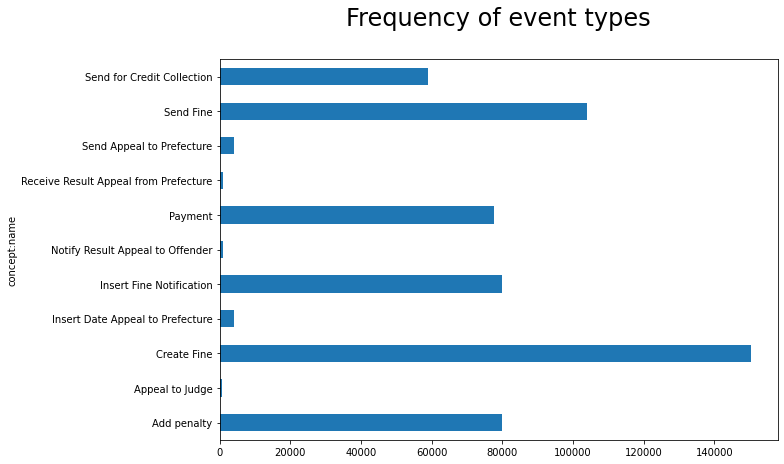

In [116]:
counts = df_time_event.sort_values(by='concept:name', ascending=False).groupby(by='concept:name')['concept:name'].count()
plt.title('Frequency of event types\n', fontdict={'fontsize': 24});
counts.plot.barh(figsize=(10, 7));

In [140]:
df_largest_trace = df_time_event[df_time_event['case:concept:name'] == 'C20817']

df_largest_trace.describe()

,time:timestamp,concept:name,case:concept:name
count,20,20,20
unique,18,6,1
top,2009-06-29 00:00:00+02:00,Payment,C20817
freq,3,15,20


- Longest trace is 20 records long
- 3 events occurred in at the same time
- **Payment** is the type of event that was the most frequent in that trace

In [142]:
df_largest_trace.describe().reset_index().loc[2, 'concept:name']


'Payment'